In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [8]:
dataset = pd.read_csv("data.csv")

In [9]:
dataset.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [10]:
X = dataset.iloc[:,:-1]
Y_d = dataset.iloc[:,-1]

In [11]:
num_pixels = X.shape[1]
num_classes = 46
img_width = 32
img_height = 32
img_depth = 1

In [12]:
X_images = X.values.reshape(X.shape[0], img_width, img_height)

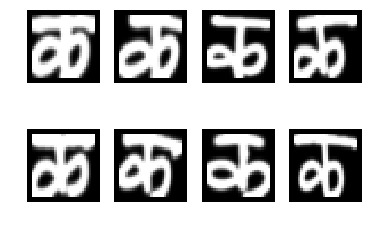

In [13]:
for i in range(1, 9):    
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1], cmap=plt.get_cmap('gray'))
plt.show()

In [14]:
dataset.iloc[:,1024].value_counts()

character_26_yaw             2000
digit_0                      2000
character_08_ja              2000
character_19_dha             2000
digit_5                      2000
character_27_ra              2000
digit_8                      2000
character_02_kha             2000
digit_2                      2000
character_31_petchiryakha    2000
character_06_cha             2000
character_04_gha             2000
digit_9                      2000
digit_7                      2000
character_21_pa              2000
character_22_pha             2000
character_10_yna             2000
character_13_daa             2000
character_05_kna             2000
digit_6                      2000
character_33_ha              2000
digit_1                      2000
character_14_dhaa            2000
digit_3                      2000
character_09_jha             2000
character_11_taamatar        2000
character_16_tabala          2000
character_17_tha             2000
character_07_chha            2000
character_01_k

In [15]:
rows_to_remove = np.where(dataset.iloc[:,1024].values==1024)
rows_to_remove

(array([], dtype=int64),)

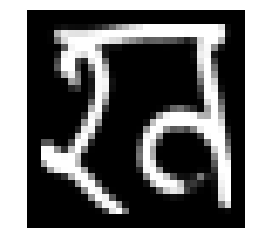

In [16]:
plt.imshow(X_images[2000], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [17]:
dataset = dataset.drop(dataset.index[rows_to_remove[0]])

In [18]:
X = dataset.iloc[:,:-1]
X_images = X.values.reshape(X.shape[0], img_width, img_height)
Y_d = dataset.iloc[:,-1]

In [19]:
# output in binary format
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
Y = binencoder.fit_transform(Y_d)

In [20]:
X = X / 255

In [21]:
seed = 123 
X_train, X_test, y_train, y_test = train_test_split(X_images, Y, test_size=0.20, random_state=seed)

X_train = X_train/255
X_test = X_test/255

In [22]:
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, img_depth).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, img_depth).astype('float32')

In [23]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (4, 4), input_shape=(img_height, img_width, img_depth), 
                     activation='relu', name="conv_1"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))
    model.add(Conv2D(64, (3, 3), activation='relu', name="conv_2"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_2"))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', name="dense_1"))
    model.add(Dense(50, activation='relu', name="dense_2"))
    model.add(Dense(num_classes, activation='softmax', name="modeloutput"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [24]:
model = cnn_model()

early_stopping_monitor = EarlyStopping(patience=2)

epochs = 10
batch_size = 200
history = model.fit(X_train, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, 
                    callbacks=[early_stopping_monitor], verbose=2)

Train on 58880 samples, validate on 14720 samples
Epoch 1/10
 - 876s - loss: 1.3037 - acc: 0.6441 - val_loss: 0.4437 - val_acc: 0.8685
Epoch 2/10
 - 871s - loss: 0.3616 - acc: 0.8909 - val_loss: 0.2577 - val_acc: 0.9235
Epoch 3/10
 - 890s - loss: 0.2308 - acc: 0.9306 - val_loss: 0.1934 - val_acc: 0.9418
Epoch 4/10
 - 1122s - loss: 0.1714 - acc: 0.9479 - val_loss: 0.1601 - val_acc: 0.9520
Epoch 5/10
 - 867s - loss: 0.1335 - acc: 0.9579 - val_loss: 0.1421 - val_acc: 0.9582
Epoch 6/10
 - 858s - loss: 0.1104 - acc: 0.9653 - val_loss: 0.1249 - val_acc: 0.9630
Epoch 7/10
 - 857s - loss: 0.0904 - acc: 0.9714 - val_loss: 0.1215 - val_acc: 0.9645
Epoch 8/10
 - 857s - loss: 0.0756 - acc: 0.9758 - val_loss: 0.1161 - val_acc: 0.9658
Epoch 9/10
 - 869s - loss: 0.0691 - acc: 0.9771 - val_loss: 0.1182 - val_acc: 0.9666
Epoch 10/10
 - 857s - loss: 0.0570 - acc: 0.9809 - val_loss: 0.1078 - val_acc: 0.9682


In [25]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.66%


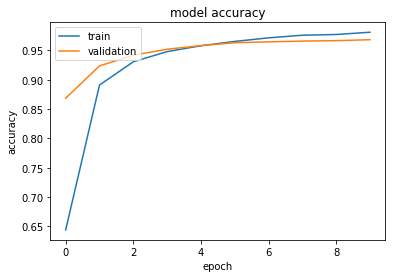

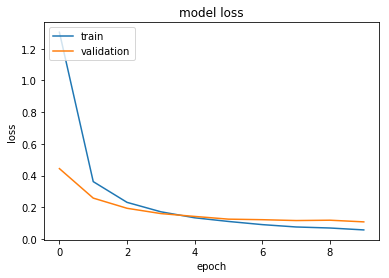

In [26]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()